In [1]:
import random, gym, math
from gym import error, spaces
import pandas as pd
import numpy as np
from enum import Enum
from stockstats import StockDataFrame
# from tensorboardX import SummaryWriter

import gym

In [2]:
# import tensorflow as tf
# from stable_baselines.common.policies import MlpPolicy, CnnPolicy, MlpLstmPolicy, ActorCriticPolicy, LstmPolicy
# from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines.common.evaluation import evaluate_policy
# from stable_baselines import PPO2, PPO1, A2C, DQN, TD3, SAC, ACER

from sb3_contrib import RecurrentPPO

from stable_baselines3.common.policies import MultiInputActorCriticPolicy
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

from sklearn import preprocessing

import datetime
import backtrader as bt
import backtrader.indicators as bi
from backtrader.feeds import PandasData

import matplotlib.pyplot as plt

from backtrader_plotting import Bokeh
from backtrader_plotting.schemes import Tradimo, Blackly

Loading BokehJS ...

In [3]:
from lutils.stock import LTdxHq

In [4]:
# result = pd.read_pickle('d:/d.pkl')

In [5]:
# result[y_kmeans==5]

In [6]:
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_NUM_AMOUNTS = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 60
MAX_STEPS = 240 # 40000
NEXT_OBSERVATION_SIZE = 10

INITIAL_ACCOUNT_BALANCE = 10000

# writer = SummaryWriter('log')

In [7]:
# ltdxhq = LTdxHq()
# code = '603636' # 603828 603828 000032 300142 603636 600519
# # df = ltdxhq.get_k_data_1min(code, end='2021-09-02') # 000032 300142 603636 600519
# df = ltdxhq.get_k_data_daily(code, end='2021-01-01') # 000032 300142 603636 600519
# df = StockDataFrame(df.rename(columns={'vol': 'volume'}))
# # df['macd']
# # df['kdjk']
# # df['rsi_6']
# # df['rsi_12']

# # df_eval = ltdxhq.get_k_data_1min(code, start='2021-08-10')
# df_eval = ltdxhq.get_k_data_daily(code, start='2021-01-01')
# df_eval = StockDataFrame(df_eval.rename(columns={'vol': 'volume'}))

# ltdxhq.close()

In [8]:
# ltdxhq = LTdxHq()

# codes = ['603636', ] # '603828', '603828', '000032', '300142', '603636', '600519'
# dfs = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, end='2021-01-01')
# #     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     dfs.append(_df) # / _df.max())

# df = pd.concat(dfs)

# df_evals = []
# for code in codes:
#     _df = ltdxhq.get_k_data_daily(code, start='2021-01-01')
#     _df = _df.rename(columns={'vol': 'volume'})
    
#     _df = _df.assign(open_normal = _df.open / _df.open.max())
#     _df = _df.assign(close_normal = _df.close / _df.close.max())
#     _df = _df.assign(high_normal = _df.high / _df.high.max())
#     _df = _df.assign(low_normal = _df.low / _df.low.max())
#     _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
#     _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
#     df_evals.append(_df)
# ltdxhq.close()

In [9]:
ltdxhq = LTdxHq()

# codes = ['603636', '603828', '688698', '000032', '300142', '603636', ] # '600519'
codes = ['600603', '600583', '600582', '600565', '600558', '600551',
       '600509', '600503', '600488', '600469', '600439', '600433',
       '600428', '600425', '600387', '600383', '600382', '600369',
       '600339', '600337', '600335', '600326', '600320', '600312',
       '002666', '002654', '002641', '002628', '002627', '002620',
       '002608', '002593', '002586', '002582', '002566', '002560',]
dfs = []
df_evals = []
for code in codes:
    _df = ltdxhq.get_k_data_daily(code)
#     _df = StockDataFrame(_df.rename(columns={'vol': 'volume'}))
    _df = _df.rename(columns={'vol': 'volume'})
    
    _df = _df.assign(open_normal = _df.open / _df.open.max())
    _df = _df.assign(close_normal = _df.close / _df.close.max())
    _df = _df.assign(high_normal = _df.high / _df.high.max())
    _df = _df.assign(low_normal = _df.low / _df.low.max())
    _df = _df.assign(volume_normal = _df.volume / _df.volume.max())
    _df = _df.assign(amount_normal = _df.amount / _df.amount.max())
    
    dfs.append(_df.loc[:'2022-01-01']) # / _df.max())
    df_evals.append(_df.loc['2022-01-01':])
    
df = pd.concat(dfs)

ltdxhq.close()

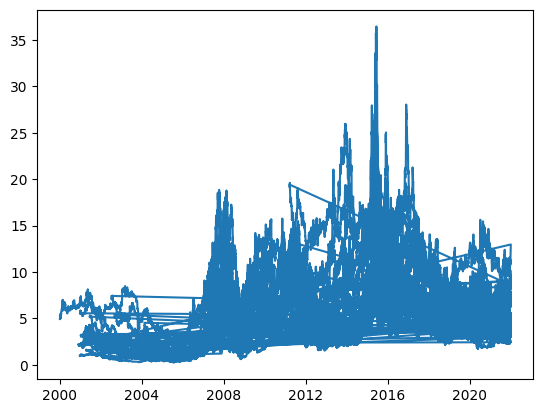

In [10]:
plt.plot(df.close)
plt.show()

In [11]:
df

,open,close,high,low,volume,amount,open_normal,close_normal,high_normal,low_normal,volume_normal,amount_normal
date,,,,,,,,,,,,
2000-01-04,4.78,4.94,4.95,4.77,1400800.0,19873510.0,0.469087,0.477756,0.455801,0.472277,0.007654,0.020889
2000-01-05,4.93,5.19,5.43,4.86,7043100.0,107845504.0,0.483808,0.501934,0.500000,0.481188,0.038484,0.113354
2000-01-06,5.13,5.35,5.37,5.07,2145300.0,32499732.0,0.503435,0.517408,0.494475,0.501980,0.011722,0.034160
2000-01-07,5.35,5.43,5.61,5.27,7018700.0,110908752.0,0.525025,0.525145,0.516575,0.521782,0.038351,0.116573
2000-01-10,5.44,5.48,5.60,5.33,5804700.0,92433640.0,0.533857,0.529981,0.515654,0.527723,0.031717,0.097155
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,6.33,6.51,6.58,6.32,23595678.0,152199808.0,0.370175,0.395024,0.374502,0.393279,0.185184,0.097914
2021-12-28,6.48,6.44,6.49,6.33,19976900.0,127804976.0,0.378947,0.390777,0.369380,0.393902,0.156783,0.082220
2021-12-29,6.43,6.43,6.54,6.36,18847400.0,121771912.0,0.376023,0.390170,0.372225,0.395769,0.147919,0.078339


In [12]:
class Actions(Enum):
    Hold = 0
    Sell = 1
    Buy = 2

In [13]:
class LStockDailyEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df):
        super(LStockDailyEnv, self).__init__()

#         self.df = df / df.max()
#         self.max = df.max()
        self.df = df
        self.max = df.max()

        self.current_step = NEXT_OBSERVATION_SIZE - 1

#         self.reward_range = (-np.inf, np.inf)
        self.reward_range = (-1, 1)

#         self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)
        self.action_space = spaces.Discrete(len(Actions))
        
        self.observation_space = spaces.Box(low=-1, high=1, shape=(6, NEXT_OBSERVATION_SIZE + 1), dtype=np.float16)
#         self.min_max_scaler = preprocessing.MinMaxScaler()

    def _next_observation(self):
        # Get the stock data points for the last 5 days and scale to between 0-1
        frame = np.array([
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['open'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['high'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['low'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['close'].values / MAX_SHARE_PRICE,
            # self.df.iloc[self.current_step: self.current_step + NEXT_OBSERVATION_SIZE]['vol'].values / MAX_NUM_SHARES,

            # self.df['macd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macdh'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['macds'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['volume_delta'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_2_d'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['open_-2_r'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['cr-ma1'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma2'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['cr-ma3'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # self.df['kdjk'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjd'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # self.df['kdjj'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # self.df['open_2_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['pdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['mdi'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['dx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adx'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # self.df['adxr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['tema'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,
            # # # self.df['vr'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].fillna(0).values,
            # # # self.df['vr_6_sma'][self.current_step: self.current_step + NEXT_OBSERVATION_SIZE].values,

#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close'].values / MAX_SHARE_PRICE,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume'].values / MAX_NUM_SHARES,
#             self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount'].values / MAX_NUM_SHARES,

#             self.df['macd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macdh'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['macds'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjk'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjd'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['kdjj'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,

#             self.df['rsi_6'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
#             self.df['rsi_12'][self.current_step - NEXT_OBSERVATION_SIZE: self.current_step].fillna(0).values,
            
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['open_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['high_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['low_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['close_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['volume_normal'].values,
            self.df.iloc[self.current_step - NEXT_OBSERVATION_SIZE: self.current_step]['amount_normal'].values,

        ])
        
        bal = np.ones([6, 1]) * self.balance / self.net_worth
#         act = np.ones([6, 1]) * action / 2
        
        frame = np.hstack([frame, bal, ]) # act
        
#         print(frame)
#         print('##########')
#         frame = self.min_max_scaler.fit_transform(frame)
# #         frame = pd.DataFrame(min_max_scaler.fit_transform(df), index=df.index, columns=df.columns)
# #         frame = self.scaler.fit_transform(frame)
#         print(frame)
#         print('*****************')
        
        return frame

    def _take_action(self, action):
        current_price = self.df.iloc[self.current_step]['close'] # + 0.02
        tomorrow_price = self.df.iloc[self.current_step + 1]['close'] # + 0.02
        
        if action == Actions.Buy.value:
            # Buy amount % of balance in shares
            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible / 100)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price * 100

            self.balance -= additional_cost
            self.cost_basis = (prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action == Actions.Sell.value:
            # Sell amount % of shares held
            shares_sold = int(self.shares_held)
            self.balance += shares_sold * current_price * 100
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * tomorrow_price * 100
        
#         print(self.balance, self.net_worth, self.shares_held, current_price)
        
        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0
        
        
    def step(self, action):
        # Execute one time step within the environment
        shares_held = self.shares_held
        self._take_action(action)
        obs = self._next_observation()
        
        reward = 0
        
#         done = ((self.current_step + 1) >= self.df.shape[0] 
#                 or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 
#                 or self.df.index[self.current_step].weekday() == 4 )
        done = ((self.current_step + 2) >= self.df.shape[0] 
                or self.net_worth <= INITIAL_ACCOUNT_BALANCE * .5 
                or action == Actions.Sell.value)
        
#         if not done:
# #             if action_type < 1: # Buy
# #                 reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
# #             elif action_type >= 1 and action_type < 2: # Sell
# #                 reward = self.df.iloc[self.current_step]['close'] - self.df.iloc[self.current_step + 1]['close']
# #             else: # Hold
# #                 reward = self.net_worth - self.old_net_worth # self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
            
#             reward = self.df.iloc[self.current_step + 1]['close'] - self.df.iloc[self.current_step]['close']
#             if (self.shares_held <= 0 and reward > 0) or (self.shares_held > 0 and reward < 0):
#                 reward = -reward
            
#             if action == Actions.Buy.value: # buy
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Sell.value: # sell
#                 if self.old_balance == self.balance:
#                     reward = reward * .5
#                 else:
#                     reward = reward
#             elif action == Actions.Hold.value and self.shares_held <= 0:
#                 reward = -np.abs(reward) # -(np.abs(reward) / self.df.iloc[self.current_step + 1]['close'])
            
# #             print(action, reward)
#             self.old_balance = self.balance
#         else:
# #             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
# #             print(self.balance, reward)
#             reward = self.net_worth - INITIAL_ACCOUNT_BALANCE
        
#         self.old_net_worth = self.net_worth
#         self.current_step = self.current_step + 1
        
#         if done:
#             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE)
#         else:
#             reward = (self.net_worth - INITIAL_ACCOUNT_BALANCE) * (self.net_worth - INITIAL_ACCOUNT_BALANCE) / INITIAL_ACCOUNT_BALANCE
        
        
        assets = self.net_worth
        cash = self.balance
        cash_penalty = max(0, (assets * 0.1 - cash))
        assets -= cash_penalty
        reward = (assets / INITIAL_ACCOUNT_BALANCE) - 1
        reward /= self.current_step
        
        ddd.append([self.net_worth, reward, action, self.current_step])
        
        self.current_step = self.current_step + 1
        return obs, reward, done, {'net_worth': self.net_worth}

    def reset(self):
        # Reset the state of the environment to an initial state
        self.balance = INITIAL_ACCOUNT_BALANCE
        self.old_balance = self.balance
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.old_net_worth = self.net_worth
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        self.current_step = self.current_step + 1
        if (self.current_step + 5) >= self.df.shape[0]:
            self.current_step = NEXT_OBSERVATION_SIZE

        return self._next_observation()

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(f'Avg cost for held shares: {self.cost_basis} (Total sales value: {self.total_sales_value})')
        print(f'Net worth: {self.net_worth} (Max net worth: {self.max_net_worth})')
        print(f'Profit: {profit}')

In [14]:
# env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(net_arch=[128, 'lstm', dict(vf=[256, 256], pi=[256, 256])])

# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
# model.learn(total_timesteps=100000)
# # model.save('ppo_stock')

In [15]:
ddd = []

In [16]:
env = DummyVecEnv([lambda: LStockDailyEnv(df)])
# policy_kwargs = dict(act_fun=tf.nn.tanh, net_arch=[256, 256, 'lstm', 256, dict(pi=[128, 64, 32, 16], vf=[128, 128, 128])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)

policy_kwargs = dict(net_arch=[256, 256, 256, dict(pi=[128, 64, 32, 16], vf=[128, 64, 32, 16])])
model = PPO('MlpPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model = RecurrentPPO('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)


model.learn(total_timesteps=40000)
# model.save('ppo_stock')

Using cuda device


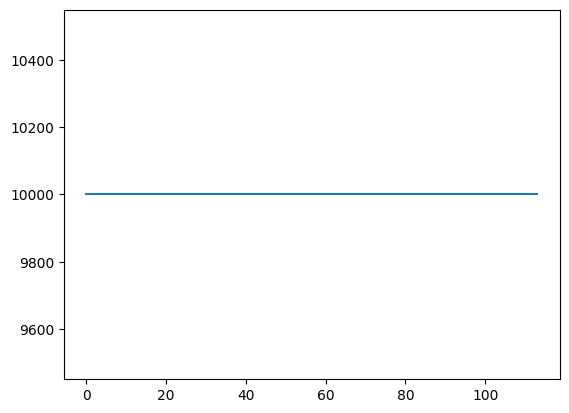

In [17]:
eval_index = 2
eval_env = DummyVecEnv([lambda: LStockDailyEnv(df_evals[eval_index])])
obs = eval_env.reset()

net_worths = []
actions = [Actions.Hold.value] * NEXT_OBSERVATION_SIZE
done, state = False, None
# while not done:

df_evals[eval_index].shape[0]
for _ in range(NEXT_OBSERVATION_SIZE, df_evals[eval_index].shape[0]):
#     print(obs)
    action, state = model.predict(obs, state=state, deterministic=True)
#     print(action)
    obs, reward, done, _info = eval_env.step(action)
    net_worths.append(_info[0]['net_worth'])
    
    actions.append(action[0])
#     eval_env.render()
    
dff = df_evals[eval_index].assign(action=actions)

dff = dff.drop(['open_normal', 'close_normal', 'high_normal', 'low_normal', 'volume_normal', 'amount_normal'], axis=1)

plt.plot(net_worths)
plt.show()

In [18]:
len(ddd)

40178

In [19]:
dddf = np.array(ddd)
dddf.shape

(40178, 4)

In [20]:
dddf[:,2][-100:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

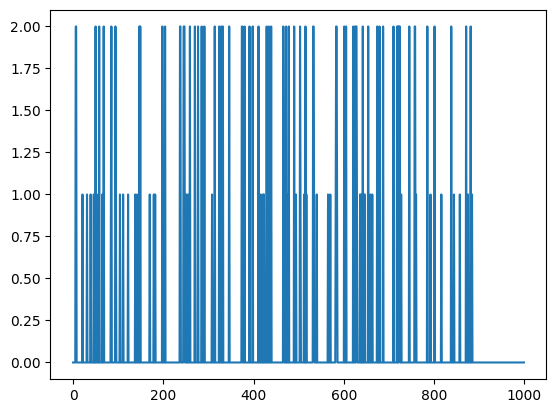

In [21]:
plt.plot(dddf[:,2][-1000:]) #, '.')
plt.show()

In [22]:
actions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
dff

,open,close,high,low,volume,amount,action
date,,,,,,,
2022-01-04,4.29,4.23,4.32,4.19,34981960.0,153853392.0,0
2022-01-05,4.22,4.13,4.25,4.11,30623968.0,131859344.0,0
2022-01-06,4.12,4.18,4.22,4.09,22627752.0,97817104.0,0
2022-01-07,4.22,4.17,4.23,4.15,22779660.0,99097568.0,0
2022-01-10,4.16,4.17,4.21,4.15,18789202.0,81438560.0,0
...,...,...,...,...,...,...,...
2022-07-05,4.72,4.75,4.84,4.65,44392988.0,210384688.0,0
2022-07-06,4.71,4.53,4.72,4.50,46320636.0,212416576.0,0
2022-07-07,4.54,4.67,4.69,4.54,37840396.0,175850624.0,0


In [2]:
class PandasDataDd(PandasData):
    # Add a 'action' line to the inherited ones from the base class
    lines = ('action',)
    
    # add the parameter to the parameters inherited from the base class
    params = (('action', 7),)

NameError: name 'PandasData' is not defined

In [3]:
class RLCross(bt.Strategy):
    def __init__(self):
#         self.sma1 = bt.indicators.SMA(self.dnames.d.dd, period=10, plot=False)
#         self.sma2 = bt.indicators.SMA(self.dnames.d.dd, period=20, plot=False)
        
#         self.crossover = bt.indicators.CrossOver(self.sma1, self.sma2)
        pass

    def next(self):
        
        if not self.position:  # not in the market
            if self.data0.action < 1: # if fast crosses slow to the upside
                price = self.data0.close[0]
                cash = self.broker.get_cash()
                share = int(math.floor((cash)/price))
                self.buy()  # enter long
        elif self.data0.action < 2 :  # in the market & cross to the downside
            self.close()


NameError: name 'bt' is not defined

In [4]:
cerebro = bt.Cerebro(oldtrades=True)

feed = PandasDataDd(dataname=dff, action=6)

cerebro.adddata(feed, name='d')
cerebro.addstrategy(RLCross)

cerebro.broker.setcash(10000.0)

cerebro.broker.setcommission(0.0005)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

NameError: name 'bt' is not defined

In [1]:
cerebro.plot(
    iplot=False,
#     start=datetime.date(2021, 1, 1),
#     end=datetime.date(2021, 11, 24),
    style='candlestick',
    barup='green',
    bardown='red',
    barupfill=True, 
    bardownfill=False,
)

NameError: name 'cerebro' is not defined